In [83]:
import numpy
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.manifold import TSNE
import imaginet.data_provider as dp
import pylab

In [93]:
modeldir = "/home/gchrupala/repos/reimaginet/run-104-extratrain/"

In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [139]:
X = numpy.load(modeldir + 'predict_r.5.npy')

In [271]:
prov = dp.getDataProvider('coco', root='/home/gchrupala/repos/reimaginet')
sent_val = [s['raw'] for s in prov.iterSentences(split='val') ]

In [95]:
pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)

In [96]:
kca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
kca.fit(X)
W = kca.transform(X)

In [97]:
ixs = numpy.random.choice(X.shape[0], 20)

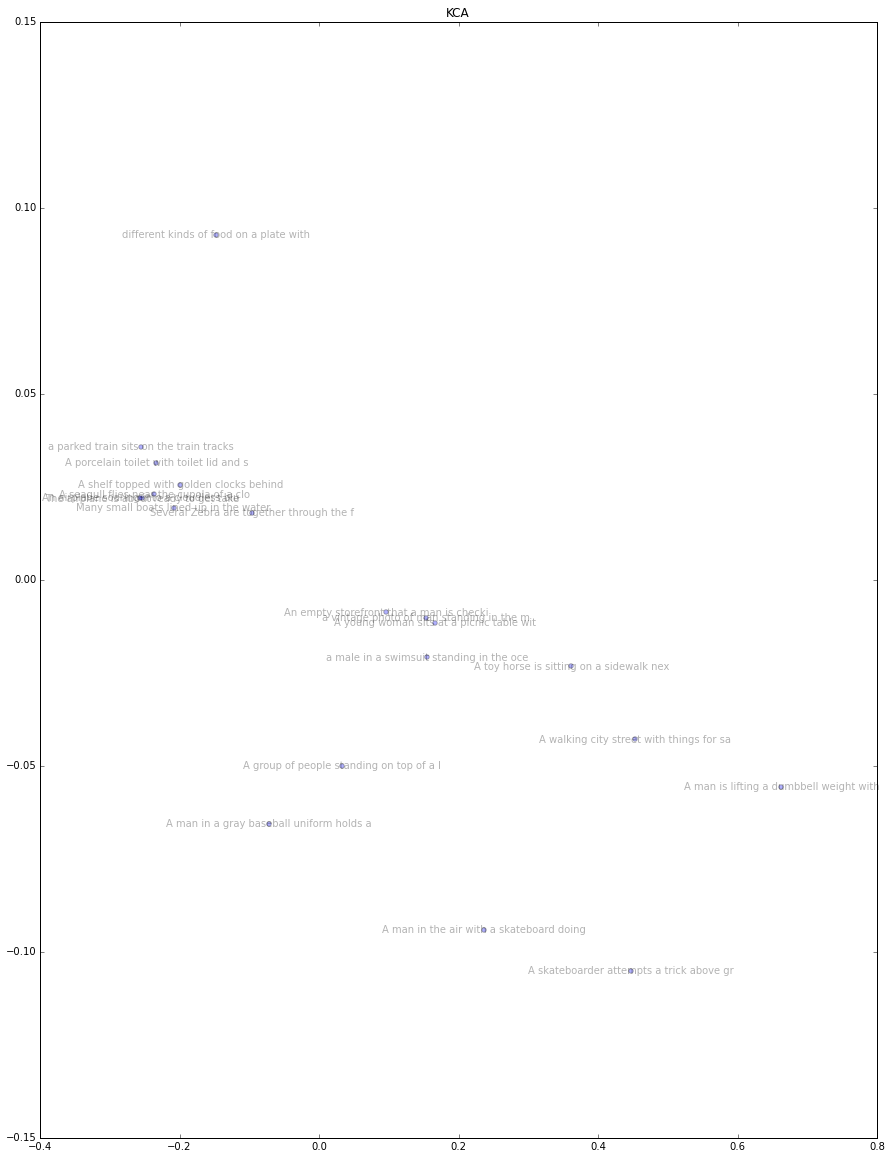

In [179]:
figure(figsize=(15,20))
#axis('off')
scatter(W[ixs,0], W[ixs,1], alpha=0.3)
for i in ixs:
    pylab.text(W[i,0], W[i,1], sent[i][0:40], va='center', ha='center', alpha=0.3)
pylab.title("KCA")

In [99]:
from imaginet.driver import *

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: Tesla K20m


In [100]:
M = load(modeldir)

/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/tensor/subtensor.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  start in [None, 0] or
/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/tensor/subtensor.py:114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  stop in [None, length, maxsize] or
/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/tensor/opt.py:2165: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (replace_x == replace_y and
/usr/local/lib/python2.7/dist-packages/Theano-0.6.0-py2.7.egg/theano/scan_module/scan_perform_ext.py:85: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [102]:
predict_r = predictor_r(M['model'])

In [104]:
import theano
import theano.tensor as T

In [106]:
def make_predictor(model):
    input = T.imatrix()
    return theano.function([input], model.network.Visual.Encode(model.network.Embed(input)))

In [107]:
predict = make_predictor(M['model'])

In [145]:
def embed(sents):
    batch = M['batcher'].batch_inp(list(M['batcher'].mapper.transform(sents)))
    return predict(batch)
    

In [332]:
sents = [ s.split() for s in ['two giraffes in a grassy area', 'some zebras running around',
                              'a woman playing badmington', 'a girl plays frisbee', 
                              'a slice of pizza', 'a bowl of salad',
                              ] ]

In [339]:
def trails(sents, size=(7,5), loc="upper right"):
    figure(figsize=size)
    axis('off')
    for i in range(len(sents)):
        sent_i = embed([sents[i]])[0]
        xy = pca.transform(sent_i)
        pylab.plot(xy[:,0], xy[:,1], label=' '.join(sents[i]), marker='o', linewidth=3, alpha=0.3)
        for j in range(0,xy.shape[0]):
            pylab.text(xy[j,0], xy[j,1], (sents[i]+['END'])[j], va='center', ha='center', alpha=0.5)
    legend(loc=loc)

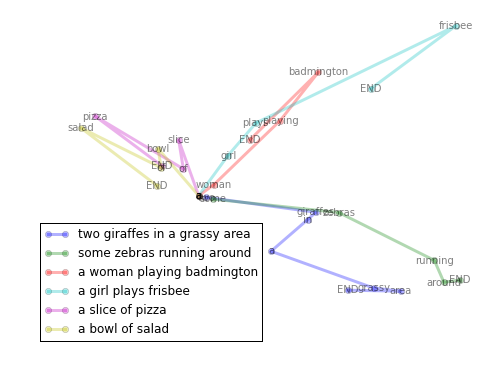

In [342]:
trails(sents, loc='lower left', size=(8,6))

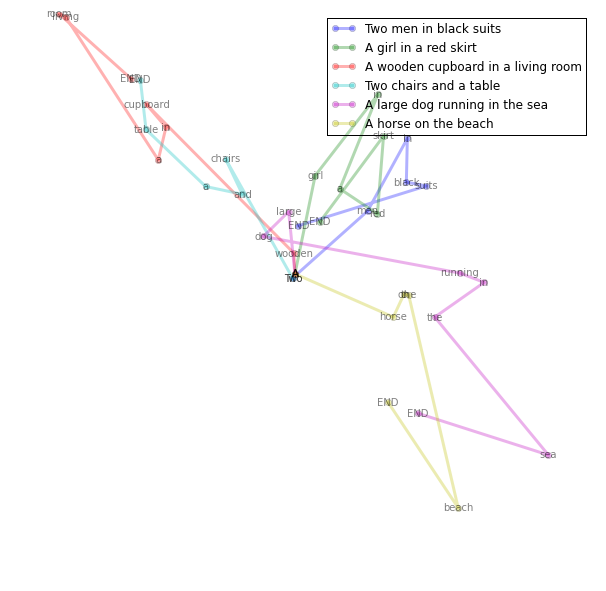

In [343]:
#sample = [ s.split() for s in numpy.random.choice(sent_val,5) ]
sample = [s.split() for s in ['Two men in black suits', 'A girl in a red skirt', 
                              'A wooden cupboard in a living room', 'Two chairs and a table',
                              'A large dog running in the sea', 'A horse on the beach']]
trails(sample, size=(10,10))

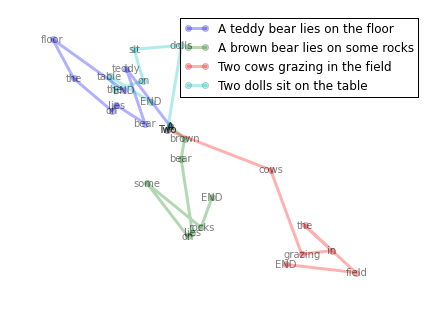

In [353]:
sample = [s.split() for s in ['A teddy bear lies on the floor',
                              'A brown bear lies on some rocks',
                              'Two cows grazing in the field',
                              'Two dolls sit on the table']]
trails(sample)